# Data Exploration: Mobile Device Usage and User Behavior Dataset

---

### Daftar Isi
- [Informasi Data](#informasi-data)
- [Permasalahan](#permasalahan)
- [Persiapan Data](#persiapan-data)
  - [Menginput Data](#menginput-data)
  - [Data Cleaning](#data-cleaning)
- [Memproses Data](#memproses-data)
  - [Exploratory Data Analysis](#exploratory-data-analysis-eda)
  - [Analyisis Masalah](#analysis-masalah)
    - [Pertanyaan](#analisa-pertanyaan)
    - [Prediksi](#analisa-prediksi)

## Permasalahan yang Dibahas
---


1. **Jumlah masing-masing model device**  
   - Berikan informasi mengenai jumlah total dari setiap model device.  
2. **Tipe smartphone yang banyak digunakan berdasarkan gender**  
   - Berikan informasi mengenai total jumlah setiap model device yang dimiliki user berdasar gender.  
3. **Pengguna OS berdasar gender**  
   - Berikan informasi mengenai jumlah total dari jenis OS yang dimiliki user berdasar gender.  
4. **Tingkat kecanduan berdasarkan umur**
   - Berikan informasi chart garis yang menampilkan antara tingkat kecanduan (%) dan umur.
5. **Model smartphone yang memiliki kualitas tinggi**
   - Buatlah sebuah perkiraan atau prediksi dari data yang dimiliki manakah device yang memiliki kualitas bagus dari kondisi yang terdata pada dataset.
6. **Pendugaan pengangguran dengan umur**
   - Buatlah sebuah perkiraan atau prediksi dari data yang dimiliki apakah bisa menyimpulkan tingkat pengganguran berdasarkan kondisi yang terdata pada dataset.

## Persiapan Data

---

### Mengimport Data

mempersiapkan keperluan dari import library yang dibutuhkan, mengimport dataset, dan mengecek dataset untuk mengetahui apakah ada data yang null atau tidak sebelum melakukan langkah selanjutnya. pengecekan bertujuan unutk mengurangi kekeliruan selama analisis berlangsung.

In [2]:
#Import Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
#Import dataset
user_behavior = pd.read_csv('user_behavior_dataset.csv')

In [4]:
#tampilin dataset
user_behavior

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


Insight:  
penjelasan variabel yang dapat berguna:
- User ID - nomor identifikasi
- Device Model - Model device
- Operating System - Sistem Operasi device
- App Usage Time - Penggunaan aplikasi harian (Menit)
- Screen On Time - Rata-rata layar menyala per hari (Jam)
- Battery Drain - Pemakaian baterai per hari (mAh)
- Number of Apps Installed - Total aplikasi terinstall pada device
- Data Usage - penggunaan kuota data per hari (MB)
- Age - Umur user
- Gender - Jenis kelamin (hanya ada 2 untuk selamanya)
- User Behavior Class - klasifikasi kecanduan dari 1 (normal) hingga 5 (kecanduan berat)

Selanjutnya, saya melakukan pengecekan data dengan `info()` untuk mengetahui informasi lengkap serta mengecek data yang null jika ada.

In [5]:
user_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


gunakan `describe()` untuk menyajikan ringkasan statistik dari data numerik dalam suatu dataset untuk nampilin rata-rata, deviasi standar, nilai minimum, kuartil, dan nilai maksimum dari setiap kolom numerik dalam dataset.

In [6]:
user_behavior.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


gunakan `duplicated()` untuk mengecek apakah ada baris duplikat dalam DataFrame, lalu tampilkan totalnya. jika ada maka otomatis menghapusnya dengan `drop_duplicates()`

In [7]:
print(f"data duplicated: {user_behavior.duplicated().sum()}")
if user_behavior.duplicated().any():
    print("duplikasi dihapys.")
    user_behavior.drop_duplicates()

data duplicated: 0


Insight : Data bersih. bisa skip cleaning

### Data Cleaning
membersihkan data jika diprosesnya terdapat null

alhamdulilah clean, skip selanjutnya

## Memproses Data
---

#### Exploratory Data Analysis (EDA)

cari korelasi antar data numerik dengan `corr()`

In [8]:
print(user_behavior.select_dtypes(include=['float64', 'int64']).corr())

                             User ID  App Usage Time (min/day)  \
User ID                     1.000000                 -0.024957   
App Usage Time (min/day)   -0.024957                  1.000000   
Screen On Time (hours/day) -0.014287                  0.950333   
Battery Drain (mAh/day)    -0.019377                  0.956385   
Number of Apps Installed   -0.023914                  0.955253   
Data Usage (MB/day)        -0.014527                  0.942308   
Age                         0.045188                  0.004382   
User Behavior Class        -0.016242                  0.970498   

                            Screen On Time (hours/day)  \
User ID                                      -0.014287   
App Usage Time (min/day)                      0.950333   
Screen On Time (hours/day)                    1.000000   
Battery Drain (mAh/day)                       0.948983   
Number of Apps Installed                      0.946975   
Data Usage (MB/day)                           0.941322   

Atau bisa memvisualisasikan nya dengan `pairplot()` 

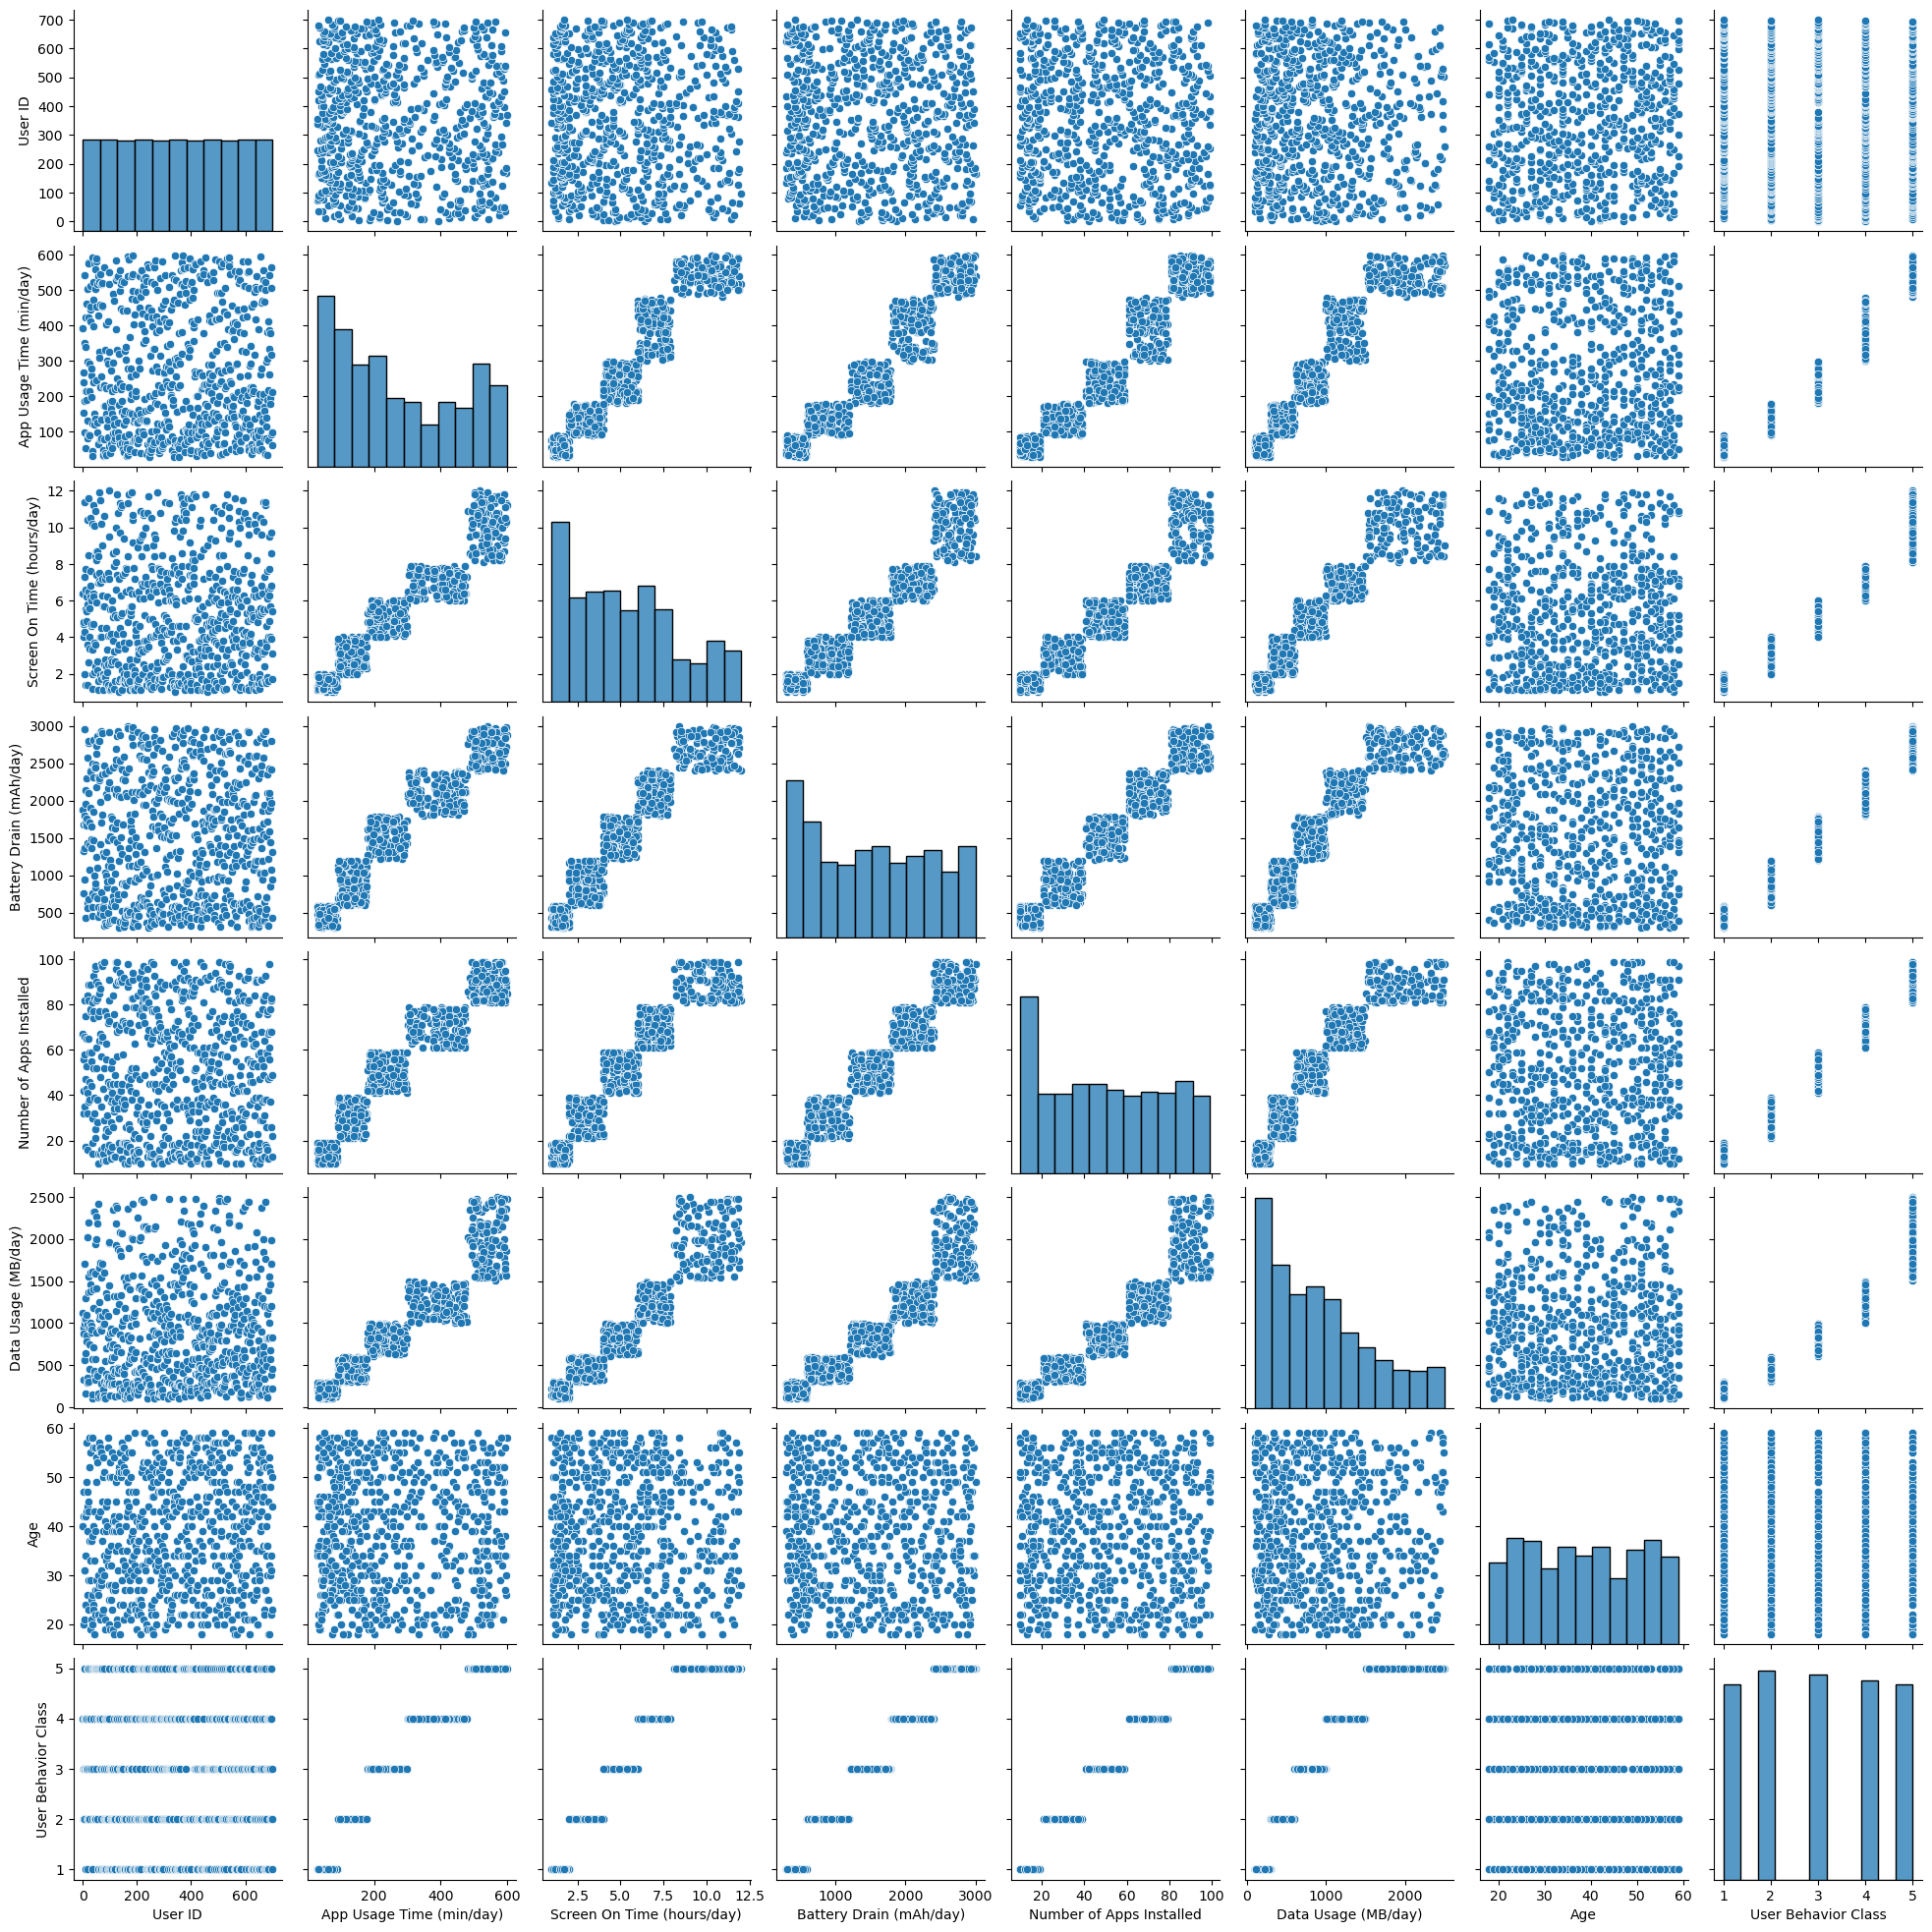

In [11]:
sns.pairplot(user_behavior)
plt.show()

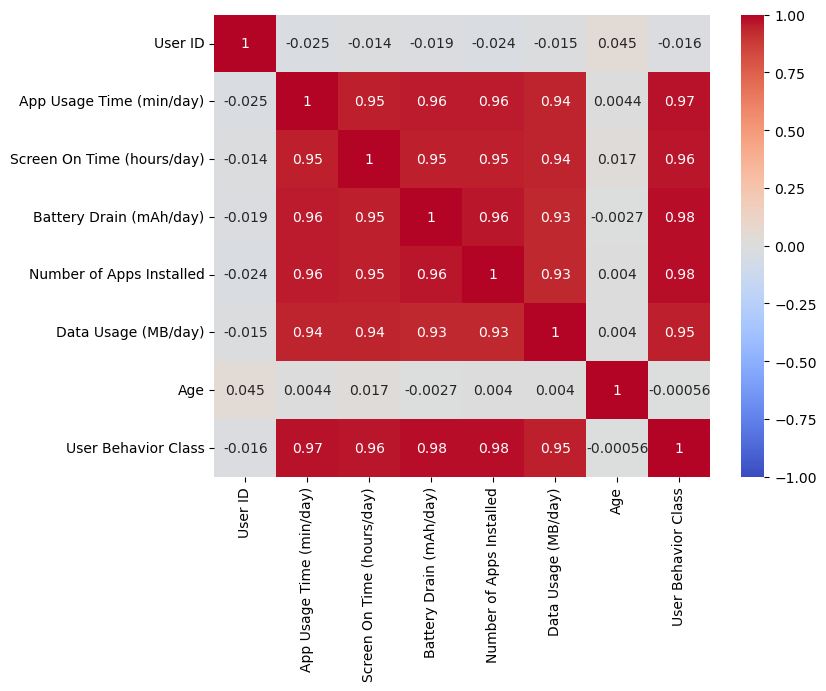

In [16]:
corr_matrix = user_behavior.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

ambil sample random agar bisa melihat data tanpa melihat keseluruhan data.

In [17]:
user_behavior.sample(10)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
77,78,Google Pixel 5,Android,173,2.5,678,29,301,30,Female,2
538,539,Google Pixel 5,Android,576,9.5,2638,98,2281,38,Female,5
620,621,iPhone 12,iOS,218,5.0,1475,46,972,59,Female,3
490,491,Google Pixel 5,Android,416,6.1,2279,71,1096,47,Male,4
230,231,iPhone 12,iOS,159,2.3,1083,32,526,38,Male,2
659,660,Xiaomi Mi 11,Android,505,9.6,2464,91,2375,35,Male,5
303,304,iPhone 12,iOS,541,11.4,2443,89,1923,34,Female,5
332,333,OnePlus 9,Android,191,6.0,1762,45,904,54,Male,3
147,148,Xiaomi Mi 11,Android,52,1.6,385,19,234,24,Male,1
588,589,OnePlus 9,Android,424,7.5,1995,75,1228,36,Male,4


lalu tampilkan statisitka deskriptif dataset dengan menggunakan `describe(include=all)`

In [10]:
user_behavior.describe(include='all')

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
count,700.00000,700,700,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700,700.000000
unique,NaN,5,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,Xiaomi Mi 11,Android,NaN,NaN,NaN,NaN,NaN,NaN,Male,NaN
freq,NaN,146,554,NaN,NaN,NaN,NaN,NaN,NaN,364,NaN
mean,350.50000,NaN,NaN,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,NaN,2.990000
std,202.21688,NaN,NaN,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,NaN,1.401476
min,1.00000,NaN,NaN,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,NaN,1.000000
25%,175.75000,NaN,NaN,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,NaN,2.000000
50%,350.50000,NaN,NaN,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,NaN,3.000000
75%,525.25000,NaN,NaN,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,NaN,4.000000


#### Pembahasan Permasalahan

##### Analisa Pertanyaan

###### **Jumlah masing-masing model device**

gunakan `groupby()` untuk mengelompokan data berdasar kolom lalu gunakan `size()` untuk menghitung setiap model yang sama dan `reset_index(name='Jumlah')` Membuat DataFrame baru dengan kolom tambahan 'Jumlah' yang menyimpan hasil hitungan

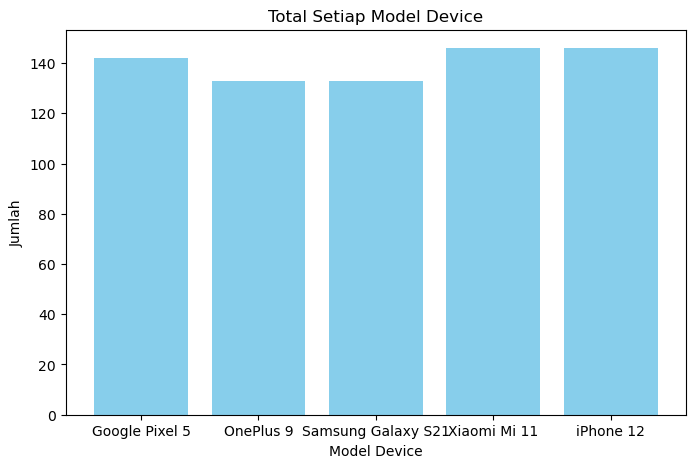

         Device Model  Jumlah
0      Google Pixel 5     142
1           OnePlus 9     133
2  Samsung Galaxy S21     133
3        Xiaomi Mi 11     146
4           iPhone 12     146


In [11]:
total_by_device = user_behavior.groupby('Device Model').size().reset_index(name='Jumlah')

# membuat bar chart
# figure untuk mengatur ukuran gambar (x, y)
plt.figure(figsize=(8, 5))
plt.bar(total_by_device['Device Model'], total_by_device['Jumlah'], color='skyblue')

# membuat chart
# x bagian horziontal (model) y bagian vertikal(Jumlah)
plt.xlabel('Model Device')
plt.ylabel('Jumlah')
plt.title('Total Setiap Model Device')

# tampilin chart
plt.show()

# tampilin total sbg plain text
print(total_by_device)


Insight:
1. iPhone 12 dan Xiaomi Mi 11 lebih diminati dari seluruh jenis model
2. pada posisi terendah terdapat OP9 dan S21

###### **Tipe smartphone yang banyak digunakan berdasarkan gender**

`total_model_by_gender = user_behavior.groupby(['Device Model', 'Gender']).size().unstack(fill_value=0)` mengelompokan data berdasar Device Model dan Gender, `fill_value=0` untuk antisipasi jika tidak ada user yang memakai model dan akan mengisi dengan 0 (karena biasanya NaN).

Gender              Female  Male
Device Model                    
Google Pixel 5          69    73
OnePlus 9               61    72
Samsung Galaxy S21      54    79
Xiaomi Mi 11            78    68
iPhone 12               74    72


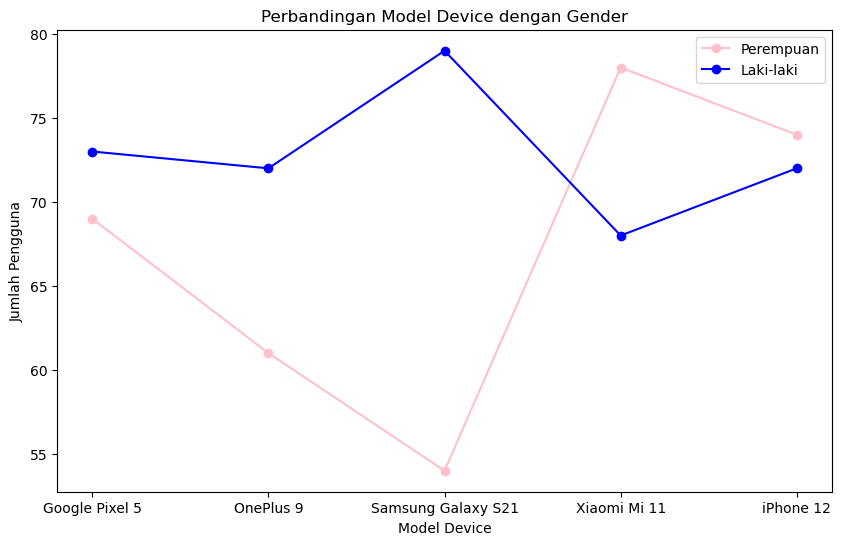

In [22]:
total_model_by_gender = user_behavior.groupby(['Device Model', 'Gender']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))

# Garis untuk perempuan
plt.plot(total_model_by_gender.index, total_model_by_gender['Female'], marker='o', label='Perempuan', color='pink')

# Garis untuk laki-laki
plt.plot(total_model_by_gender.index, total_model_by_gender['Male'], marker='o', label='Laki-laki', color='blue')

# Bikin label
plt.xlabel('Model Device')
plt.ylabel('Jumlah Pengguna')
plt.title('Perbandingan Model Device dengan Gender')
plt.legend()

# tampilkan secara plain text
print(total_model_by_gender)

Insight:
1. Laki-laki dominan memakai S21
2. Perempuan dominan Xiaomi Mi 11
3. GoPix 5, OP9, dan S21 lebih diminati pria
4. Xiaomi Mi 11 dan iPhone 12 lebih diminati wanita

Revisi:  
- Chart perbandingan seharusnya bar chart bukan line chart. karena line chart untuk lebih ke data historis.

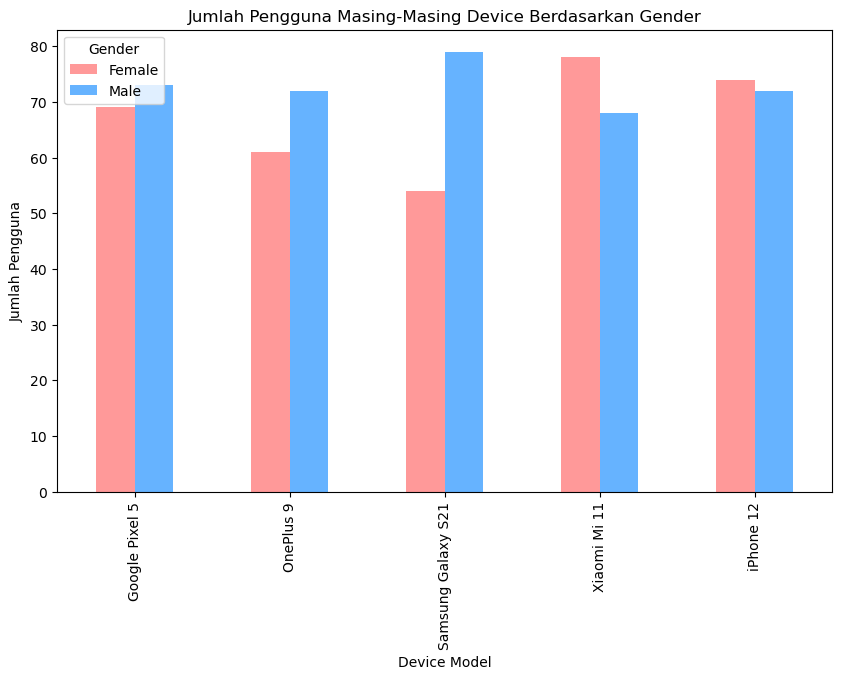

In [27]:
# Menghitung jumlah setiap Device Model
device_counts = user_behavior.groupby(['Device Model', 'Gender']).size().unstack(fill_value=0)

# Membuat barchart
device_counts.plot(kind='bar', stacked=False, figsize=(10, 6), color=['#ff9999','#66b3ff'])

# Menambahkan judul dan label
plt.title('Jumlah Pengguna Masing-Masing Device Berdasarkan Gender')
plt.xlabel('Device Model')
plt.ylabel('Jumlah Pengguna')

# Menampilkan plot
plt.show()

###### **Pengguna OS berdasar gender**

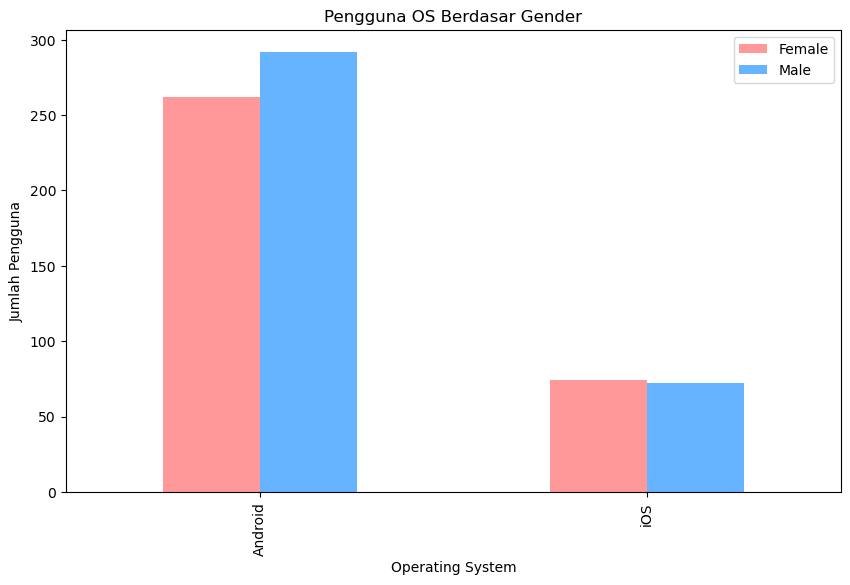

Gender            Female  Male
Operating System              
Android              262   292
iOS                   74    72


In [34]:
# kelompokan data lalu hitung
total_os_by_gender = user_behavior.groupby(['Operating System', 'Gender']).size().unstack(fill_value=0)

# visualisasikaan pakai bar chart
# warna pertama untuk "Female" kedua "Male"
total_os_by_gender.plot(kind='bar', stacked=False, figsize=(10, 6), color=['#ff9999','#66b3ff'])

# Tambahkan label dan judul
plt.xlabel('Operating System')
plt.ylabel('Jumlah Pengguna')
plt.title('Pengguna OS Berdasar Gender')
plt.legend()

# tampilkan
plt.show()

# tampilkan plain textnya
print(total_os_by_gender)

Insight:  
1. iOS lebih dominan perempuan
2. Android lebih dominan laki-laki
3. keseluruhan pengguna Android masih tinggi

###### **Tingkat Kecanduan Berdasarkan Umur**

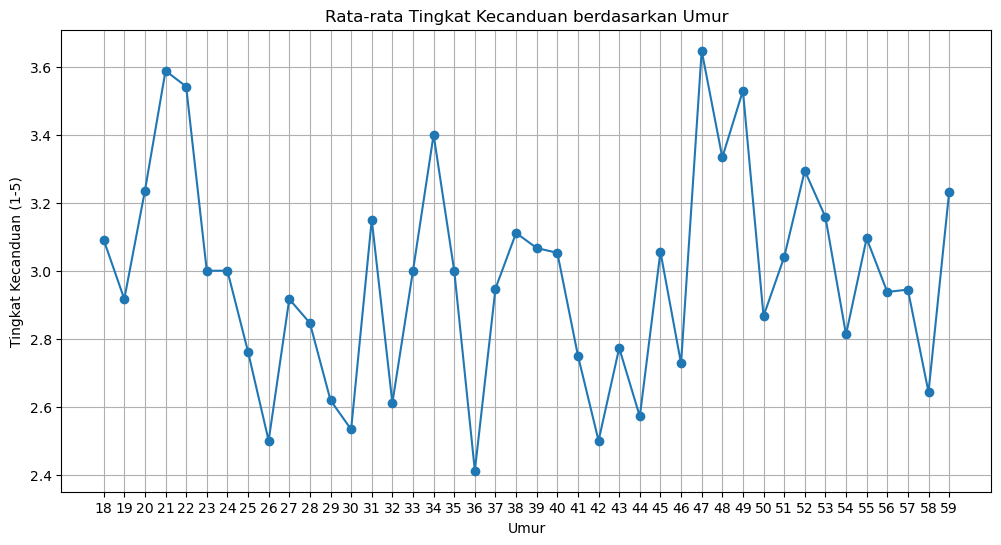

In [73]:
kecanduan_by_umur = user_behavior.groupby('Age')['User Behavior Class'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(kecanduan_by_umur['Age'], kecanduan_by_umur['User Behavior Class'], marker='o')
plt.title('Rata-rata Tingkat Kecanduan berdasarkan Umur')
plt.xlabel('Umur')
plt.ylabel('Tingkat Kecanduan (1-5)')
plt.xticks(range(min(user_behavior['Age']), max(user_behavior['Age']) + 1))  # Menyesuaikan ticks x
plt.grid(True)
plt.show()

Insight:
1. Kecanduan stabil awal terjadi pada umur 19-26
2. 26 bisa diasumsikan sudah pada fokus bekerja
3. 32-36 bisa diasumsikan posisi jatuh bangun dalam kehidupan (PHK, resign, atau sakit)
4. 46+ mungkin karena masuk masa santai atau melawan penyakit

Revisi:
- Seharusnya menggunakan bar chart. karena line chart tidak cocok untuk perbandingan dan hanya cocok untuk historis(?).

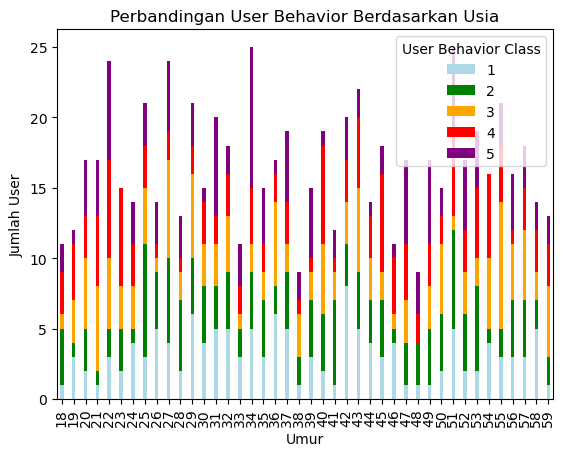

In [50]:
ketergantungan_by_age = user_behavior.groupby('Age')['User Behavior Class'].value_counts().unstack(fill_value=0)

# Membuat barchart
ketergantungan_by_age.plot(kind='bar', stacked=True, color=['lightblue', 'green', 'orange', 'red', 'purple'], width=0.3)

# Menambahkan judul dan label

plt.title('Perbandingan User Behavior Berdasarkan Usia')
plt.xlabel('Umur')
plt.ylabel('Jumlah User')

# Menampilkan plot
plt.show()

# cara lebarinnya gimana (?????)

###### **Model smartphone yang memiliki kualitas tinggi**

kami membandingkan beberapa data yang dirasa berpengaruh dalam menentukan kualitas device.
- Screen On Time : Dengan semakin tinggi 

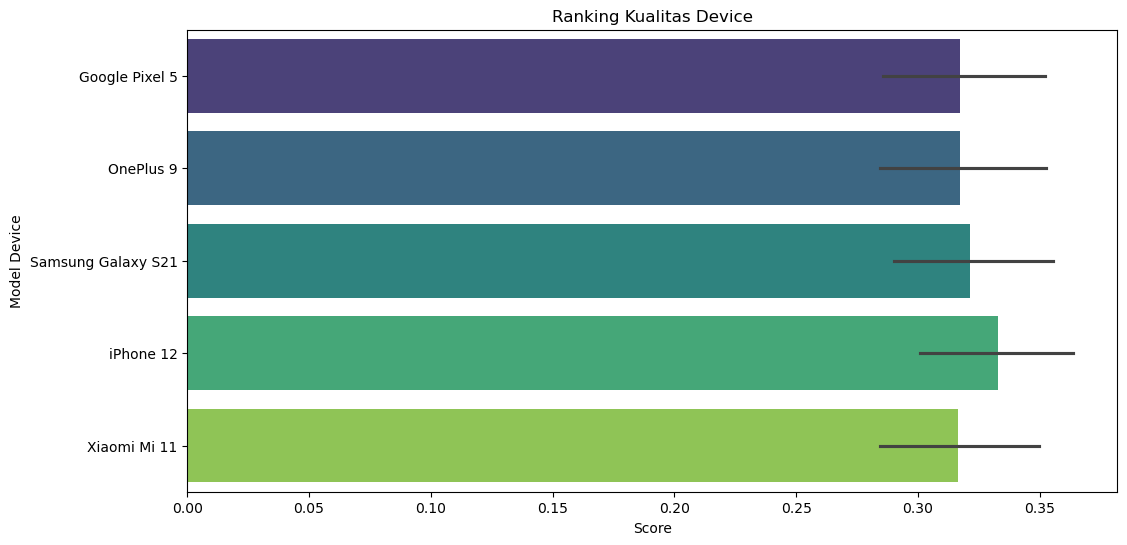

     User ID        Device Model Operating System  App Usage Time (min/day)  \
169      170      Google Pixel 5          Android                       587   
80        81           OnePlus 9          Android                       565   
122      123      Google Pixel 5          Android                       584   
378      379  Samsung Galaxy S21          Android                       525   
489      490      Google Pixel 5          Android                       586   
..       ...                 ...              ...                       ...   
399      400           OnePlus 9          Android                        49   
458      459           iPhone 12              iOS                        56   
449      450      Google Pixel 5          Android                        34   
213      214        Xiaomi Mi 11          Android                        41   
73        74        Xiaomi Mi 11          Android                        31   

     Screen On Time (hours/day)  Battery Drain (mAh

In [18]:
# Pembobotan
# Dikurang variabel Battery Drain
weights = {
    'ScreenON': 0.2,
    'InstalledApps': 0.4,
    'AppUsage': 0.4,
    'BatteryDrain': -0.3 
}

# Normalisasi nilai untuk setiap parameter
user_behavior['ScreenON_norm'] = user_behavior['Screen On Time (hours/day)'] / user_behavior['Screen On Time (hours/day)'].max()
user_behavior['InstalledApps_norm'] = user_behavior['Number of Apps Installed'] / user_behavior['Number of Apps Installed'].max()
user_behavior['AppUsage_norm'] = user_behavior['App Usage Time (min/day)'] / user_behavior['App Usage Time (min/day)'].max()
user_behavior['BatteryDrain_norm'] = user_behavior['Battery Drain (mAh/day)'] / user_behavior['Battery Drain (mAh/day)'].max()

# Menghitung skor total
user_behavior['score'] = (
    weights['ScreenON'] * user_behavior['ScreenON_norm'] +
    weights['InstalledApps'] * user_behavior['InstalledApps_norm'] +
    weights['AppUsage'] * user_behavior['AppUsage_norm'] +
    weights['BatteryDrain'] * user_behavior['BatteryDrain_norm']
)

# Mengurutkan data yang sudah di ranked  secara disascending
ranked_devices = user_behavior.sort_values(by='score', ascending=False)

# Konfigurasi chart
plt.figure(figsize=(12, 6))
sns.barplot(x='score', y='Device Model', data=ranked_devices, palette='viridis', hue='Device Model', legend=False)

# Label chart dan lainnya
plt.title('Ranking Kualitas Device')
plt.xlabel('Score')
plt.ylabel('Model Device')

# Tampilkan chart
plt.show()

# Tampilkan raw hasil (opsional)
print(ranked_devices)

Insight:
1. iPhone 12 sepertinya menjuarai
2. posisi kedua ada S21
3. posisi ketiga ada OP9

###### **Hipotesis pengangguran dengan umur**

Berikut poin yang dipertimbangkan:
1. Screen On Time - belum tentu tapi memiliki kemungkinan berbanding dengan waktunya
2. App Usage Time - memiliki kemungkinan medium dan berbanding dengan banyaknya waktu digunakan
3. Data Usage - cukup berpengaruh bisa jadi user menonton atau bermain dengan intens
4. User Behavior Class - Sangat berpengaruh karena ini data valid dari user yang bisa meningkatkan validasi data

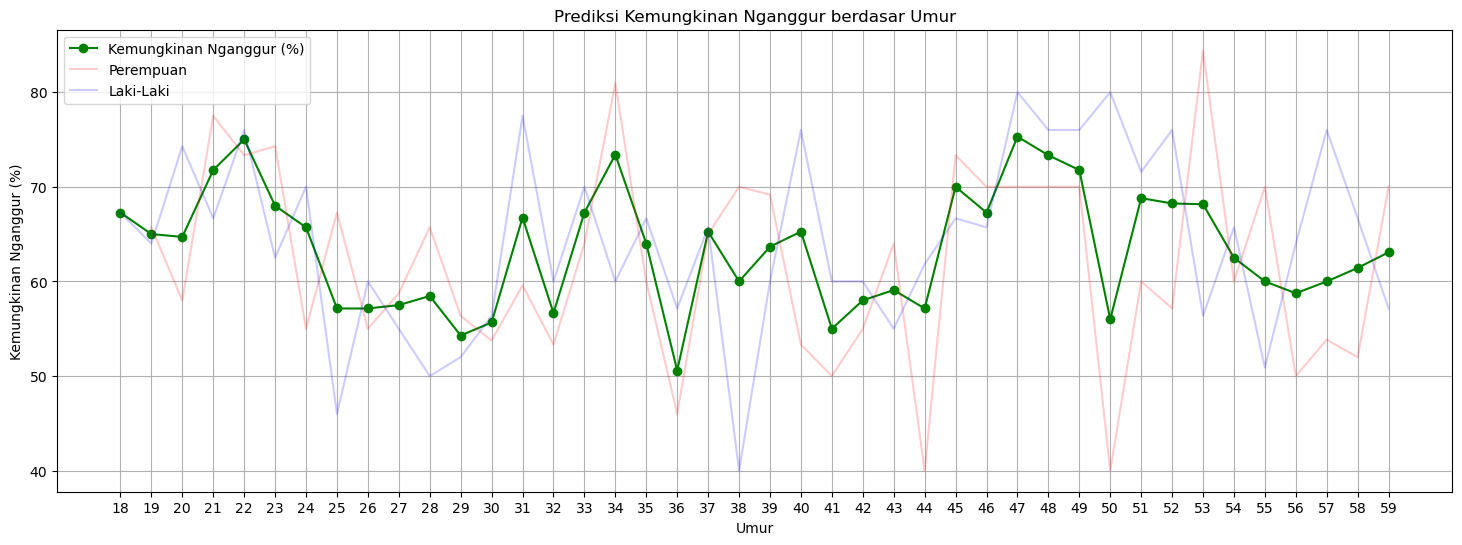

In [32]:
def prediksi_nganggur(row):
    nganggur_credit = 0
    #if row['Screen On Time (hours/day)'] > 6 and row['App Usage Time (min/day)'] > 4 and row['Data Usage (MB/day)'] > 1000:
    if row['Screen On Time (hours/day)'] > 6:
        nganggur_credit += 0.05
    if row['App Usage Time (min/day)'] > 4:
        nganggur_credit += 0.2
    if row['Data Usage (MB/day)'] > 1000:
        nganggur_credit += 0.25
    if row['User Behavior Class'] >= 4:
        nganggur_credit += 0.3
    if row['Battery Drain (mAh/day)'] > 70:
        nganggur_credit += 0.2
    return nganggur_credit

user_behavior['Kemungkinan Nganggur'] = user_behavior.apply(prediksi_nganggur, axis=1)

# Hitung rata-rata "Kemungkinan Nganggur" per umur
umur_nganggur = user_behavior.groupby('Age')['Kemungkinan Nganggur'].mean()
umur_nganggur_by_gender = user_behavior.groupby(['Age', 'Gender'])['Kemungkinan Nganggur'].mean().unstack()

# Visualisasikan dalam bentuk line chart (dengan sumbu Y sebagai persen)
plt.figure(figsize=(18, 6))

# Rata-rata keseluruhan %pengangguran
plt.plot(umur_nganggur.index, umur_nganggur.values * 100, marker='o', color='g', label='Kemungkinan Nganggur (%)')

# Rata-rata berdasar gender
plt.plot(umur_nganggur_by_gender.index, umur_nganggur_by_gender['Female'] * 100, alpha=0.2, color='r', label='Perempuan')
plt.plot(umur_nganggur_by_gender.index, umur_nganggur_by_gender['Male'] * 100, alpha=0.2, color='b', label='Laki-Laki')

# konfigurasi dan pelabelan chart
plt.xlabel('Umur')
plt.ylabel('Kemungkinan Nganggur (%)')
plt.title('Prediksi Kemungkinan Nganggur berdasar Umur')
plt.xticks(umur_nganggur.index)
plt.grid(True)
plt.legend()
plt.show()

Insight :  
1. mayoritas stabil di usia 44+, kemungkinan karena sudah tua atau pensiun
2. umur 25 adalah posisi curam untuk laki laki dan perupakan titik pengangguran terendah (real)
3. puncak tinggi untuk perempuan antara 20-24 bisa karena baru lulus atau fresh graduate
4. penggangguran laki-laki stabil keatas mulai pada umur 43+ kemungkinan karena pensiun

---
Terimakasih.